Rewards per repetition: {1: [74.0, 27.0, 2.0, 3.0, 16.0, 4.0, 2.0, 0.0, 0.0, 1.0, 0.0, 6.0, 1.0, 0.0, 9.0, 16.0, 1.0, 10.0, 4.0, 4.0, 1.0, 2.0, 3.0, 0.0, 17.0, 0.0, 3.0, 1.0, 9.0, 7.0, 0.0, 0.0, 10.0, 13.0, 1.0, 18.0, 2.0, 0.0, 1.0, 2.0, 6.0, 0.0, 1.0, 12.0, 1.0, 1.0, 1.0, 6.0, 9.0, 17.0, 3.0, 5.0, 4.0, 3.0, 2.0, 0.0, 2.0, 4.0, 0.0, 4.0, 3.0, 4.0, 2.0, 0.0, 8.0, 1.0, 3.0, 2.0, 1.0, 7.0, 5.0, 13.0, 12.0, 10.0, 10.0, 14.0, 2.0, 0.0, 7.0, 5.0, 14.0, 6.0, 16.0, 1.0, 12.0, 4.0, 4.0, 6.0, 10.0, 17.0, 12.0, 19.0, 0.0, 0.0, 2.0, 8.0, 20.0, 5.0, 6.0, 2.0], 2: [2.0, 34.0, 2.0, 8.0, 18.0, 9.0, 15.0, 4.0, 1.0, 5.0, 5.0, 4.0, 11.0, 0.0, 1.0, 2.0, 4.0, 3.0, 7.0, 21.0, 5.0, 0.0, 12.0, 1.0, 0.0, 17.0, 3.0, 7.0, 2.0, 15.0, 8.0, 5.0, 1.0, 5.0, 1.0, 11.0, 4.0, 9.0, 6.0, 0.0, 3.0, 6.0, 0.0, 0.0, 2.0, 4.0, 1.0, 4.0, 2.0, 0.0, 8.0, 0.0, 9.0, 5.0, 6.0, 6.0, 9.0, 1.0, 10.0, 3.0, 9.0, 5.0, 5.0, 3.0, 5.0, 0.0, 5.0, 1.0, 12.0, 9.0, 2.0, 12.0, 9.0, 2.0, 16.0, 19.0, 2.0, 1.0, 8.0, 3.0, 10.0, 5.0, 3.0, 0.0, 0.0, 7.

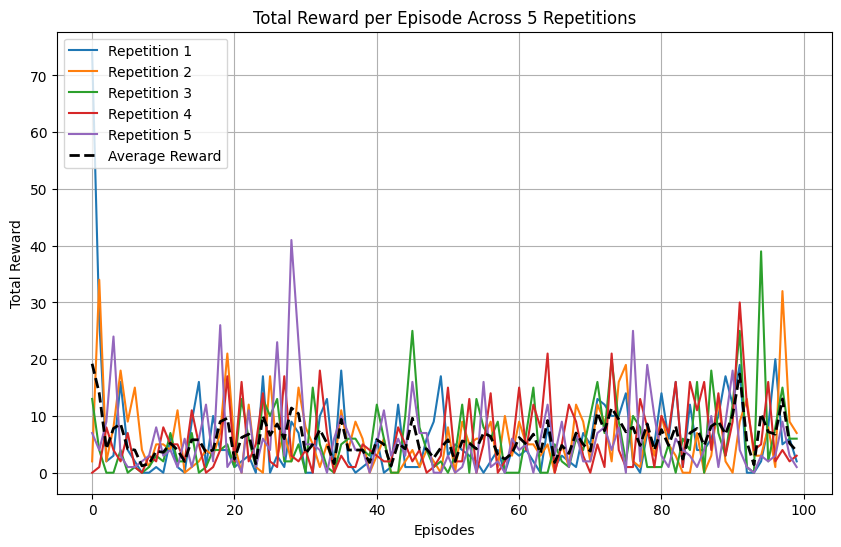

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

text = """
Repetition	Episode	Total Reward	Q Value Before	Q Value After	Priority
1.0	1.0	74.0	254.6139678955080	253.08843994140600	1.0
1.0	2.0	27.0	10.652486801147500	10.603343963623000	1.0
1.0	3.0	2.0	13.602703094482400	13.612552642822300	1.0
1.0	4.0	3.0	13.377882957458500	13.314929008483900	1.0
1.0	5.0	16.0	1.4732692241668700	1.4285833835601800	1.0
1.0	6.0	4.0	0.42010223865509000	0.4103044271469120	1.0
1.0	7.0	2.0	1.2075814008712800	1.181412696838380	1.0
1.0	8.0	0.0	-0.5835909247398380	-0.5686031579971310	1.0
1.0	9.0	0.0	-1.948931097984310	-1.9466229677200300	1.0
1.0	10.0	1.0	-0.8031092286109920	-0.775079607963562	1.0
1.0	11.0	0.0	-1.119178056716920	-1.1512640714645400	1.0
1.0	12.0	6.0	-2.50801944732666	-2.485696315765380	1.0
1.0	13.0	1.0	-0.11120223999023400	-0.07406874746084210	1.0
1.0	14.0	0.0	1.062893033027650	1.0136480331420900	1.0
1.0	15.0	9.0	-0.7235044240951540	-0.7406205534935000	1.0
1.0	16.0	16.0	0.7638322710990910	0.7492998242378240	1.0
1.0	17.0	1.0	1.6028732061386100	1.570885419845580	1.0
1.0	18.0	10.0	0.9516123533248900	0.8567718863487240	1.0
1.0	19.0	4.0	0.9800438284873960	0.9464524388313290	1.0
1.0	20.0	4.0	0.8564985394477840	0.8354277014732360	1.0
1.0	21.0	1.0	0.8942124843597410	0.8858708739280700	1.0
1.0	22.0	2.0	0.39133113622665400	0.33253395557403600	1.0
1.0	23.0	3.0	0.24854514002800000	0.20086947083473200	1.0
1.0	24.0	0.0	0.34804844856262200	0.2994222342967990	1.0
1.0	25.0	17.0	0.6259350776672360	0.5852135419845580	1.0
1.0	26.0	0.0	-0.4792402684688570	-0.5184171199798580	1.0
1.0	27.0	3.0	0.41409486532211300	0.3442431092262270	1.0
1.0	28.0	1.0	0.9484875202178960	0.8205402493476870	1.0
1.0	29.0	9.0	-0.037617139518261000	-0.06220415234565740	1.0
1.0	30.0	7.0	0.7649394273757940	0.7117028832435610	1.0
1.0	31.0	0.0	0.6884356737136840	0.6774538159370420	1.0
1.0	32.0	0.0	0.21158520877361300	0.21916763484478000	1.0
1.0	33.0	10.0	1.1348971128463700	1.0458842515945400	1.0
1.0	34.0	13.0	1.249072790145870	1.1993354558944700	1.0
1.0	35.0	1.0	0.6305615305900570	0.5721785426139830	1.0
1.0	36.0	18.0	0.8649290204048160	0.8088054656982420	1.0
1.0	37.0	2.0	1.6208301782608000	1.5542761087417600	1.0
1.0	38.0	0.0	0.9903484582901000	0.9820392727851870	1.0
1.0	39.0	1.0	1.078786015510560	1.0204321146011400	1.0
1.0	40.0	2.0	1.0743107795715300	0.9712074398994450	1.0
1.0	41.0	6.0	0.4466857314109800	0.4170893132686620	1.0
1.0	42.0	0.0	0.5964797139167790	0.570737898349762	1.0
1.0	43.0	1.0	1.3762468099594100	1.2754608392715500	1.0
1.0	44.0	12.0	1.6216167211532600	1.5336713790893600	1.0
1.0	45.0	1.0	1.228873372077940	1.1220719814300500	1.0
1.0	46.0	1.0	1.6971044540405300	1.6043903827667200	1.0
1.0	47.0	1.0	0.8794105052948000	0.8230579495429990	1.0
1.0	48.0	6.0	1.0000998973846400	0.9525691270828250	1.0
1.0	49.0	9.0	1.226166844367980	1.2047922611236600	1.0
1.0	50.0	17.0	1.891194462776180	1.8538607358932500	1.0
1.0	51.0	3.0	1.8062114715576200	1.7902432680130000	1.0
1.0	52.0	5.0	1.1090761423111000	1.0681710243225100	1.0
1.0	53.0	4.0	1.897444486618040	1.8531395196914700	1.0
1.0	54.0	3.0	2.2721168994903600	2.2530760765075700	1.0
1.0	55.0	2.0	2.6529595851898200	2.628781795501710	1.0
1.0	56.0	0.0	2.6718626022338900	2.5905871391296400	1.0
1.0	57.0	2.0	3.1574013233184800	3.074866771698000	1.0
1.0	58.0	4.0	2.4147140979766800	2.391213893890380	1.0
1.0	59.0	0.0	1.7504527568817100	1.6767444610595700	1.0
1.0	60.0	4.0	1.273950457572940	1.2484771013259900	1.0
1.0	61.0	3.0	1.4880784749984700	1.4806610345840500	1.0
1.0	62.0	4.0	1.3136658668518100	1.288106918334960	1.0
1.0	63.0	2.0	1.2313436269760100	1.1912760734558100	1.0
1.0	64.0	0.0	1.1778504848480200	1.1744495630264300	1.0
1.0	65.0	8.0	2.0703227519989000	1.987527847290040	1.0
1.0	66.0	1.0	1.776045322418210	1.7723020315170300	1.0
1.0	67.0	3.0	1.5110689401626600	1.481658697128300	1.0
1.0	68.0	2.0	1.9052871465683000	1.9033313989639300	1.0
1.0	69.0	1.0	1.6805009841918900	1.6804054975509600	1.0
1.0	70.0	7.0	0.9668835401535030	0.9527598023414610	1.0
1.0	71.0	5.0	1.232057809829710	1.225651502609250	1.0
1.0	72.0	13.0	1.3158069849014300	1.3092714548111000	1.0
1.0	73.0	12.0	2.383192539215090	2.3770108222961400	1.0
1.0	74.0	10.0	1.8169279098510700	1.8055604696273800	1.0
1.0	75.0	10.0	1.5557632446289100	1.5508019924163800	1.0
1.0	76.0	14.0	1.559007167816160	1.5501118898391700	1.0
1.0	77.0	2.0	1.7889565229415900	1.7847869396209700	1.0
1.0	78.0	0.0	1.518022060394290	1.5091418027877800	1.0
1.0	79.0	7.0	1.764286994934080	1.7606638669967700	1.0
1.0	80.0	5.0	1.6443207263946500	1.6375315189361600	1.0
1.0	81.0	14.0	2.2898473739624000	2.2779898643493700	1.0
1.0	82.0	6.0	1.3321095705032300	1.3216936588287400	1.0
1.0	83.0	16.0	2.094583034515380	2.0825676918029800	1.0
1.0	84.0	1.0	1.7334771156311000	1.7241392135620100	1.0
1.0	85.0	12.0	1.3302350044250500	1.3272476196289100	1.0
1.0	86.0	4.0	1.4334468841552700	1.4221978187561000	1.0
1.0	87.0	4.0	1.4865221977233900	1.48225736618042	1.0
1.0	88.0	6.0	1.5215480327606200	1.5162073373794600	1.0
1.0	89.0	10.0	1.4485087394714400	1.4341025352478000	1.0
1.0	90.0	17.0	2.6388065814971900	2.6313953399658200	1.0
1.0	91.0	12.0	1.6635807752609300	1.6633007526397700	1.0
1.0	92.0	19.0	1.368417501449590	1.363118052482610	1.0
1.0	93.0	0.0	1.270599126815800	1.259212613105770	1.0
1.0	94.0	0.0	1.2793340682983400	1.2697737216949500	1.0
1.0	95.0	2.0	1.3286736011505100	1.3183202743530300	1.0
1.0	96.0	8.0	1.3015153408050500	1.289720058441160	1.0
1.0	97.0	20.0	1.5573588609695400	1.5502032041549700	1.0
1.0	98.0	5.0	1.2582648992538500	1.2534537315368700	1.0
1.0	99.0	6.0	1.9232735633850100	1.9154415130615200	1.0
1.0	100.0	2.0	1.7803974151611300	1.7758104801178000	1.0
2.0	1.0	2.0	1.6793712377548200	1.6769051551818800	1.0
2.0	2.0	34.0	1.6278396844863900	1.6199005842208900	1.0
2.0	3.0	2.0	1.1235623359680200	1.1168849468231200	1.0
2.0	4.0	8.0	1.7330710887908900	1.7308080196380600	1.0
2.0	5.0	18.0	1.1118831634521500	1.1118593215942400	1.0
2.0	6.0	9.0	1.1207191944122300	1.1129082441330000	1.0
2.0	7.0	15.0	1.3591938018798800	1.3543694019317600	1.0
2.0	8.0	4.0	1.2353675365448000	1.2320144176483200	1.0
2.0	9.0	1.0	1.1980581283569300	1.1953656673431400	1.0
2.0	10.0	5.0	1.2327966690063500	1.2235395908355700	1.0
2.0	11.0	5.0	1.2401816844940200	1.2394685745239300	1.0
2.0	12.0	4.0	1.1391348838806200	1.1351979970932000	1.0
2.0	13.0	11.0	1.1592469215393100	1.1594226360321000	1.0
2.0	14.0	0.0	1.2969943284988400	1.292273998260500	1.0
2.0	15.0	1.0	1.280125379562380	1.276841402053830	1.0
2.0	16.0	2.0	1.1273566484451300	1.1224474906921400	1.0
2.0	17.0	4.0	1.2836593389511100	1.2761800289154100	1.0
2.0	18.0	3.0	1.088005781173710	1.08870530128479	1.0
2.0	19.0	7.0	1.1597180366516100	1.1544491052627600	1.0
2.0	20.0	21.0	1.3474390506744400	1.344801664352420	1.0
2.0	21.0	5.0	1.3745713233947800	1.3688969612121600	1.0
2.0	22.0	0.0	1.4766361713409400	1.4741921424865700	1.0
2.0	23.0	12.0	1.3284821510314900	1.3277945518493700	1.0
2.0	24.0	1.0	1.2165827751159700	1.2129151821136500	1.0
2.0	25.0	0.0	1.5131983757019000	1.5090233087539700	1.0
2.0	26.0	17.0	1.6918554306030300	1.676261305809020	1.0
2.0	27.0	3.0	1.3421988487243700	1.339207410812380	1.0
2.0	28.0	7.0	1.328874111175540	1.3245697021484400	1.0
2.0	29.0	2.0	1.2290472984314000	1.2297399044036900	1.0
2.0	30.0	15.0	1.100538969039920	1.0991675853729200	1.0
2.0	31.0	8.0	1.2659944295883200	1.2606909275054900	1.0
2.0	32.0	5.0	1.1931226253509500	1.1894116401672400	1.0
2.0	33.0	1.0	1.2545664310455300	1.2534739971160900	1.0
2.0	34.0	5.0	1.31853449344635	1.3115332126617400	1.0
2.0	35.0	1.0	1.2384034395217900	1.2352789640426600	1.0
2.0	36.0	11.0	1.462667465209960	1.460526943206790	1.0
2.0	37.0	4.0	1.3786818981170700	1.3768376111984300	1.0
2.0	38.0	9.0	1.2626075744628900	1.2582361698150600	1.0
2.0	39.0	6.0	1.100630521774290	1.097247838974000	1.0
2.0	40.0	0.0	1.135124683380130	1.1338413953781100	1.0
2.0	41.0	3.0	1.4012041091918900	1.3958637714386000	1.0
2.0	42.0	6.0	1.637361764907840	1.6354782581329300	1.0
2.0	43.0	0.0	1.395477056503300	1.3885918855667100	1.0
2.0	44.0	0.0	1.3183653354644800	1.3168809413909900	1.0
2.0	45.0	2.0	1.330278754234310	1.3280584812164300	1.0
2.0	46.0	4.0	1.4635937213897700	1.4549291133880600	1.0
2.0	47.0	1.0	1.694922924041750	1.6879489421844500	1.0
2.0	48.0	4.0	1.610493540763860	1.5984458923339800	1.0
2.0	49.0	2.0	1.584288239479070	1.5765396356582600	1.0
2.0	50.0	0.0	1.563509464263920	1.5563139915466300	1.0
2.0	51.0	8.0	1.112684726715090	1.1090952157974200	1.0
2.0	52.0	0.0	1.213883399963380	1.2121719121933000	1.0
2.0	53.0	9.0	1.274652123451230	1.273801326751710	1.0
2.0	54.0	5.0	1.5344126224517800	1.5181496143341100	1.0
2.0	55.0	6.0	1.2560200691223100	1.2550477981567400	1.0
2.0	56.0	6.0	1.3255252838134800	1.3254069089889500	1.0
2.0	57.0	9.0	1.3283478021621700	1.324246883392330	1.0
2.0	58.0	1.0	1.4467978477478000	1.4456905126571700	1.0
2.0	59.0	10.0	1.4365167617797900	1.4357026815414400	1.0
2.0	60.0	3.0	1.358382225036620	1.3556625843048100	1.0
2.0	61.0	9.0	1.9742164611816400	1.9748936891555800	1.0
2.0	62.0	5.0	1.5975658893585200	1.594825267791750	1.0
2.0	63.0	5.0	1.3592638969421400	1.3580055236816400	1.0
2.0	64.0	3.0	1.4681111574173000	1.464785099029540	1.0
2.0	65.0	5.0	1.55287766456604	1.5514910221099900	1.0
2.0	66.0	0.0	1.5111401081085200	1.5104647874832200	1.0
2.0	67.0	5.0	1.5665291547775300	1.5605645179748500	1.0
2.0	68.0	1.0	1.4020062685012800	1.3985987901687600	1.0
2.0	69.0	12.0	1.545818567276000	1.535935401916500	1.0
2.0	70.0	9.0	1.6125627756118800	1.6121561527252200	1.0
2.0	71.0	2.0	1.5594050884246800	1.5572720766067500	1.0
2.0	72.0	12.0	1.5097079277038600	1.505167007446290	1.0
2.0	73.0	9.0	1.3766472339630100	1.3734184503555300	1.0
2.0	74.0	2.0	1.3085675239563000	1.3092067241668700	1.0
2.0	75.0	16.0	1.4971843957901	1.4873225688934300	1.0
2.0	76.0	19.0	1.2208812236785900	1.218748688697820	1.0
2.0	77.0	2.0	1.2358146905899000	1.2351337671279900	1.0
2.0	78.0	1.0	1.4066076278686500	1.4050825834274300	1.0
2.0	79.0	8.0	1.4309000968933100	1.4240198135376000	1.0
2.0	80.0	3.0	1.2608975172042800	1.2561404705047600	1.0
2.0	81.0	10.0	1.3308393955230700	1.3282482624054000	1.0
2.0	82.0	5.0	1.3311114311218300	1.3286501169204700	1.0
2.0	83.0	3.0	1.6505883932113600	1.6393101215362500	1.0
2.0	84.0	0.0	1.3986122608184800	1.3924846649169900	1.0
2.0	85.0	0.0	1.4199453592300400	1.4168697595596300	1.0
2.0	86.0	7.0	1.4712998867034900	1.4706155061721800	1.0
2.0	87.0	0.0	1.654404640197750	1.6511201858520500	1.0
2.0	88.0	3.0	1.4395078420639000	1.4302150011062600	1.0
2.0	89.0	13.0	1.5685194730758700	1.563407063484190	1.0
2.0	90.0	2.0	1.4870702028274500	1.4859501123428300	1.0
2.0	91.0	0.0	1.481687307357790	1.4783928394317600	1.0
2.0	92.0	9.0	1.402270793914800	1.3989742994308500	1.0
2.0	93.0	13.0	1.1300657987594600	1.1269190311431900	1.0
2.0	94.0	3.0	1.1744533777236900	1.1716339588165300	1.0
2.0	95.0	3.0	1.380385160446170	1.3764379024505600	1.0
2.0	96.0	8.0	1.6580513715744000	1.6557337045669600	1.0
2.0	97.0	1.0	1.4684267044067400	1.4664281606674200	1.0
2.0	98.0	32.0	1.2909587621688800	1.2892688512802100	1.0
2.0	99.0	9.0	1.3275933265686000	1.3260438442230200	1.0
2.0	100.0	7.0	1.2293912172317500	1.225829005241390	1.0
3.0	1.0	13.0	1.5250024795532200	1.5228134393692000	1.0
3.0	2.0	4.0	1.5724399089813200	1.5721334218978900	1.0
3.0	3.0	0.0	1.467738389968870	1.467341423034670	1.0
3.0	4.0	0.0	1.4924771785736100	1.490810513496400	1.0
3.0	5.0	4.0	1.390803337097170	1.386535406112670	1.0
3.0	6.0	0.0	1.3230383396148700	1.319016456604000	1.0
3.0	7.0	1.0	1.193555235862730	1.1910147666931200	1.0
3.0	8.0	0.0	1.2430636882782000	1.242217779159550	1.0
3.0	9.0	1.0	1.2635581493377700	1.261275291442870	1.0
3.0	10.0	3.0	1.5232124328613300	1.5220038890838600	1.0
3.0	11.0	2.0	1.4827882051467900	1.4791498184204100	1.0
3.0	12.0	7.0	1.3503026962280300	1.3500392436981200	1.0
3.0	13.0	2.0	1.4727697372436500	1.4719200134277300	1.0
3.0	14.0	2.0	1.4742990732193000	1.470686435699460	1.0
3.0	15.0	7.0	1.4368669986724900	1.4356765747070300	1.0
3.0	16.0	0.0	1.3964426517486600	1.3951680660247800	1.0
3.0	17.0	1.0	1.2834854125976600	1.2804524898529100	1.0
3.0	18.0	4.0	1.2813148498535200	1.2770988941192600	1.0
3.0	19.0	4.0	1.3147921562194800	1.3103172779083300	1.0
3.0	20.0	5.0	1.3919756412506100	1.3901665210723900	1.0
3.0	21.0	1.0	1.3489460945129400	1.3449714183807400	1.0
3.0	22.0	13.0	1.378198504447940	1.3742433786392200	1.0
3.0	23.0	6.0	1.5422706604003900	1.5400629043579100	1.0
3.0	24.0	1.0	1.4753503799438500	1.4697530269622800	1.0
3.0	25.0	13.0	1.5614644289016700	1.5621737241745000	1.0
3.0	26.0	10.0	1.5418322086334200	1.5380991697311400	1.0
3.0	27.0	13.0	1.5355950593948400	1.5346617698669400	1.0
3.0	28.0	2.0	1.3129701614379900	1.3115414381027200	1.0
3.0	29.0	2.0	1.406174659729000	1.4056107997894300	1.0
3.0	30.0	5.0	1.4414427280426000	1.4399311542511000	1.0
3.0	31.0	0.0	1.433162808418270	1.4312963485717800	1.0
3.0	32.0	15.0	1.8374985456466700	1.8343310356140100	1.0
3.0	33.0	5.0	1.4296188354492200	1.4277998208999600	1.0
3.0	34.0	1.0	1.6408547163009600	1.6407825946807900	1.0
3.0	35.0	0.0	1.5337748527526900	1.5302166938781700	1.0
3.0	36.0	5.0	1.5001552104950000	1.4991850852966300	1.0
3.0	37.0	6.0	1.4753919839859000	1.472233772277830	1.0
3.0	38.0	6.0	1.6029882431030300	1.6037217378616300	1.0
3.0	39.0	4.0	1.6241434812545800	1.6226774454116800	1.0
3.0	40.0	3.0	1.5259627103805500	1.5241748094558700	1.0
3.0	41.0	12.0	1.6149709224700900	1.6123864650726300	1.0
3.0	42.0	6.0	1.304866075515750	1.3026306629180900	1.0
3.0	43.0	0.0	1.3017785549163800	1.2995163202285800	1.0
3.0	44.0	0.0	1.2307559251785300	1.2300089597702000	1.0
3.0	45.0	10.0	1.450218677520750	1.4493165016174300	1.0
3.0	46.0	25.0	1.4573118686676000	1.4554885625839200	1.0
3.0	47.0	8.0	1.5076128244400000	1.5051007270813000	1.0
3.0	48.0	4.0	1.4093449115753200	1.4071348905563400	1.0
3.0	49.0	1.0	1.466557502746580	1.4654275178909300	1.0
3.0	50.0	2.0	1.5324537754058800	1.5301477909088100	1.0
3.0	51.0	0.0	1.4305341243743900	1.4289976358413700	1.0
3.0	52.0	3.0	1.4270347356796300	1.4254229068756100	1.0
3.0	53.0	12.0	1.596832275390630	1.5959149599075300	1.0
3.0	54.0	0.0	1.5630327463150000	1.5596741437912000	1.0
3.0	55.0	13.0	1.630916714668270	1.625596046447750	1.0
3.0	56.0	8.0	1.4847968816757200	1.4829760789871200	1.0
3.0	57.0	6.0	1.533663272857670	1.5336076021194500	1.0
3.0	58.0	9.0	1.3967398405075100	1.3946259021759000	1.0
3.0	59.0	0.0	1.3823225498199500	1.3802402019500700	1.0
3.0	60.0	0.0	1.374115228652950	1.3724274635314900	1.0
3.0	61.0	0.0	1.454576015472410	1.4524081945419300	1.0
3.0	62.0	7.0	1.3978538513183600	1.3958624601364100	1.0
3.0	63.0	15.0	1.344723105430600	1.3418855667114300	1.0
3.0	64.0	0.0	1.2942004203796400	1.2918574810028100	1.0
3.0	65.0	0.0	1.418792963027950	1.4147703647613500	1.0
3.0	66.0	5.0	1.4534153938293500	1.451825499534610	1.0
3.0	67.0	2.0	1.6309924125671400	1.6289756298065200	1.0
3.0	68.0	1.0	1.459333896636960	1.456937551498410	1.0
3.0	69.0	6.0	1.567440152168270	1.565212607383730	1.0
3.0	70.0	4.0	1.5274919271469100	1.5261826515197800	1.0
3.0	71.0	10.0	1.620097279548650	1.6195534467697100	1.0
3.0	72.0	16.0	1.8283512592315700	1.823512315750120	1.0
3.0	73.0	7.0	1.6065073013305700	1.6053005456924400	1.0
3.0	74.0	20.0	1.5524297952652000	1.5501869916915900	1.0
3.0	75.0	9.0	1.6047170162200900	1.6017907857894900	1.0
3.0	76.0	2.0	1.5260695219039900	1.5258841514587400	1.0
3.0	77.0	10.0	1.5995908975601200	1.5982584953308100	1.0
3.0	78.0	8.0	1.7360148429870600	1.7330011129379300	1.0
3.0	79.0	1.0	1.712287425994870	1.709704041481020	1.0
3.0	80.0	1.0	1.7329868078231800	1.7289354801178000	1.0
3.0	81.0	1.0	1.6682872772216800	1.6660833358764600	1.0
3.0	82.0	5.0	1.4959416389465300	1.4954651594162000	1.0
3.0	83.0	0.0	1.5165563821792600	1.5152908563613900	1.0
3.0	84.0	6.0	1.5797147750854500	1.5785821676254300	1.0
3.0	85.0	4.0	1.4893982410430900	1.4877866506576500	1.0
3.0	86.0	16.0	1.6426674127578700	1.6422525644302400	1.0
3.0	87.0	0.0	1.635991096496580	1.634843111038210	1.0
3.0	88.0	18.0	1.6155449151992800	1.6135807037353500	1.0
3.0	89.0	7.0	1.4562840461731000	1.454160213470460	1.0
3.0	90.0	3.0	1.5338225364685100	1.533406138420110	1.0
3.0	91.0	12.0	1.6350317001342800	1.6331305503845200	1.0
3.0	92.0	25.0	1.5581467151641800	1.5557304620742800	1.0
3.0	93.0	1.0	1.4925109148025500	1.4914923906326300	1.0
3.0	94.0	0.0	1.4567077159881600	1.4559540748596200	1.0
3.0	95.0	39.0	1.310874104499820	1.3104972839355500	1.0
3.0	96.0	2.0	1.2768292427063000	1.276307463645940	1.0
3.0	97.0	8.0	1.3230880498886100	1.322580337524410	1.0
3.0	98.0	15.0	1.337562918663030	1.3348854780197100	1.0
3.0	99.0	6.0	1.3911058902740500	1.3913261890411400	1.0
3.0	100.0	6.0	1.418915867805480	1.4054911136627200	1.0
4.0	1.0	0.0	1.2152485847473100	1.2136269807815600	1.0
4.0	2.0	1.0	1.2692663669586200	1.267651915550230	1.0
4.0	3.0	8.0	1.2911874055862400	1.290340781211850	1.0
4.0	4.0	4.0	1.3253535032272300	1.324662208557130	1.0
4.0	5.0	2.0	1.2687702178955100	1.2669222354888900	1.0
4.0	6.0	7.0	1.3600810766220100	1.3582521677017200	1.0
4.0	7.0	1.0	1.2179514169693000	1.2179136276245100	1.0
4.0	8.0	0.0	1.3173673152923600	1.3164786100387600	1.0
4.0	9.0	3.0	1.2366135120391800	1.2362353801727300	1.0
4.0	10.0	2.0	1.2970904111862200	1.2964835166931200	1.0
4.0	11.0	8.0	1.3346748352050800	1.3335307836532600	1.0
4.0	12.0	5.0	1.344089150428770	1.3432966470718400	1.0
4.0	13.0	5.0	1.3743005990982100	1.3721002340316800	1.0
4.0	14.0	2.0	1.2195111513137800	1.218767762184140	1.0
4.0	15.0	11.0	1.2914206981658900	1.2906296253204300	1.0
4.0	16.0	5.0	1.348185420036320	1.3471441268920900	1.0
4.0	17.0	0.0	1.359360933303830	1.3588696718215900	1.0
4.0	18.0	1.0	1.4018468856811500	1.4018123149871800	1.0
4.0	19.0	4.0	1.2787997722625700	1.276776909828190	1.0
4.0	20.0	17.0	1.3487566709518400	1.3482102155685400	1.0
4.0	21.0	2.0	1.3207696676254300	1.3187580108642600	1.0
4.0	22.0	16.0	1.4425439834594700	1.4419804811477700	1.0
4.0	23.0	2.0	1.3129823207855200	1.3125548362731900	1.0
4.0	24.0	5.0	1.500652551651000	1.5000180006027200	1.0
4.0	25.0	14.0	1.3997882604599	1.399816870689390	1.0
4.0	26.0	2.0	1.4057832956314100	1.4046868085861200	1.0
4.0	27.0	1.0	1.6748051643371600	1.6718376874923700	1.0
4.0	28.0	17.0	1.67833411693573	1.6762895584106400	1.0
4.0	29.0	3.0	1.3675055503845200	1.3670542240142800	1.0
4.0	30.0	2.0	1.3853117227554300	1.384298324584960	1.0
4.0	31.0	4.0	1.4658890962600700	1.466320276260380	1.0
4.0	32.0	0.0	1.4223833084106400	1.421446442604070	1.0
4.0	33.0	18.0	1.4815770387649500	1.480027437210080	1.0
4.0	34.0	7.0	1.2633740901947000	1.2626532316207900	1.0
4.0	35.0	0.0	1.3981413841247600	1.3963940143585200	1.0
4.0	36.0	3.0	1.2408398389816300	1.240939974784850	1.0
4.0	37.0	1.0	1.2401033639907800	1.2390694618225100	1.0
4.0	38.0	1.0	1.2397167682647700	1.2388445138931300	1.0
4.0	39.0	5.0	1.230792760849000	1.2302663326263400	1.0
4.0	40.0	4.0	1.297942876815800	1.297505259513860	1.0
4.0	41.0	3.0	1.314216136932370	1.3134419918060300	1.0
4.0	42.0	2.0	1.313214898109440	1.3123260736465500	1.0
4.0	43.0	2.0	1.3172003030777000	1.315752387046810	1.0
4.0	44.0	8.0	1.4086310863494900	1.406655192375180	1.0
4.0	45.0	5.0	1.424310326576230	1.4231288433075000	1.0
4.0	46.0	2.0	1.176487922668460	1.1751755475997900	1.0
4.0	47.0	4.0	1.3916397094726600	1.3914878368377700	1.0
4.0	48.0	0.0	1.3826103210449200	1.3821531534194900	1.0
4.0	49.0	1.0	1.3797132968902600	1.378967046737670	1.0
4.0	50.0	3.0	1.3688113689422600	1.3690930604934700	1.0
4.0	51.0	15.0	1.3199489116668700	1.3192638158798200	1.0
4.0	52.0	2.0	1.3826991319656400	1.3819646835327100	1.0
4.0	53.0	2.0	1.3518751859664900	1.3501942157745400	1.0
4.0	54.0	13.0	1.4862993955612200	1.4846973419189500	1.0
4.0	55.0	0.0	1.4258191585540800	1.4251524209976200	1.0
4.0	56.0	5.0	1.4838595390319800	1.483193278312680	1.0
4.0	57.0	14.0	1.4760602712631200	1.473845362663270	1.0
4.0	58.0	0.0	1.4429117441177400	1.4415072202682500	1.0
4.0	59.0	2.0	1.4158152341842700	1.4148436784744300	1.0
4.0	60.0	4.0	1.3749911785125700	1.3743090629577600	1.0
4.0	61.0	15.0	1.4498906135559100	1.448408603668210	1.0
4.0	62.0	4.0	1.502138614654540	1.5006721019744900	1.0
4.0	63.0	12.0	1.3959367275238000	1.3937814235687300	1.0
4.0	64.0	8.0	1.4058939218521100	1.4052695035934400	1.0
4.0	65.0	21.0	1.4145305156707800	1.4140394926071200	1.0
4.0	66.0	0.0	1.358324646949770	1.3576807975769000	1.0
4.0	67.0	5.0	1.3863415718078600	1.384678840637210	1.0
4.0	68.0	12.0	1.3583917617797900	1.3576918840408300	1.0
4.0	69.0	9.0	1.3138940334320100	1.3137062788009600	1.0
4.0	70.0	3.0	1.2714391946792600	1.2704601287841800	1.0
4.0	71.0	0.0	1.2880500555038500	1.2854775190353400	1.0
4.0	72.0	5.0	1.3065553903579700	1.3052867650985700	1.0
4.0	73.0	1.0	1.286180853843690	1.28363835811615	1.0
4.0	74.0	21.0	1.3053644895553600	1.3047314882278400	1.0
4.0	75.0	4.0	1.3898223638534500	1.3895171880722000	1.0
4.0	76.0	1.0	1.3300986289978000	1.3300026655197100	1.0
4.0	77.0	1.0	1.3284497261047400	1.327755331993100	1.0
4.0	78.0	13.0	1.294419765472410	1.2931894063949600	1.0
4.0	79.0	8.0	1.3747700452804600	1.3723143339157100	1.0
4.0	80.0	1.0	1.3672754764556900	1.3651700019836400	1.0
4.0	81.0	10.0	1.4036071300506600	1.403059482574460	1.0
4.0	82.0	7.0	1.3994063138961800	1.3990404605865500	1.0
4.0	83.0	16.0	1.4260547161102300	1.4245365858078000	1.0
4.0	84.0	1.0	1.2242497205734300	1.2243906259536700	1.0
4.0	85.0	16.0	1.421018123626710	1.4199659824371300	1.0
4.0	86.0	11.0	1.4255112409591700	1.4244399070739700	1.0
4.0	87.0	16.0	1.3543996810913100	1.3537365198135400	1.0
4.0	88.0	4.0	1.2903131246566800	1.28859543800354	1.0
4.0	89.0	14.0	1.3516744375228900	1.350701928138730	1.0
4.0	90.0	3.0	1.3637276887893700	1.3624542951583900	1.0
4.0	91.0	9.0	1.2579827308654800	1.25684654712677	1.0
4.0	92.0	30.0	1.3611489534378100	1.3601332902908300	1.0
4.0	93.0	12.0	1.3571455478668200	1.3562042713165300	1.0
4.0	94.0	4.0	1.3261679410934400	1.3252454996109000	1.0
4.0	95.0	5.0	1.2672985792160000	1.2664066553115800	1.0
4.0	96.0	16.0	1.288297414779660	1.2875455617904700	1.0
4.0	97.0	2.0	1.2697378396987900	1.26921808719635	1.0
4.0	98.0	4.0	1.1806896924972500	1.1795532703399700	1.0
4.0	99.0	2.0	1.2568031549453700	1.2552088499069200	1.0
4.0	100.0	3.0	1.2368401288986200	1.2357953786850000	1.0
5.0	1.0	7.0	1.3188607692718500	1.3175889253616300	1.0
5.0	2.0	4.0	1.3473414182663000	1.3449327945709200	1.0
5.0	3.0	9.0	1.36063551902771	1.3596111536026	1.0
5.0	4.0	24.0	1.2930883169174200	1.2898597717285200	1.0
5.0	5.0	3.0	1.334663987159730	1.3346880674362200	1.0
5.0	6.0	1.0	1.2172672748565700	1.2151979207992600	1.0
5.0	7.0	1.0	1.2978357076644900	1.296628475189210	1.0
5.0	8.0	2.0	1.3003088235855100	1.2987831830978400	1.0
5.0	9.0	3.0	1.2769502401351900	1.2763656377792400	1.0
5.0	10.0	8.0	1.309305191040040	1.3080943822860700	1.0
5.0	11.0	3.0	1.2776153087616000	1.276447057724000	1.0
5.0	12.0	4.0	1.3065770864486700	1.304667592048650	1.0
5.0	13.0	1.0	1.3649171590805100	1.3617503643035900	1.0
5.0	14.0	6.0	1.2666876316070600	1.2658170461654700	1.0
5.0	15.0	1.0	1.274189829826360	1.2734706401825000	1.0
5.0	16.0	6.0	1.3070688247680700	1.3062032461166400	1.0
5.0	17.0	12.0	1.3680254220962500	1.368046760559080	1.0
5.0	18.0	2.0	1.4135771989822400	1.411372423172000	1.0
5.0	19.0	26.0	1.3142415285110500	1.3132123947143600	1.0
5.0	20.0	1.0	1.2418867349624600	1.2412052154541000	1.0
5.0	21.0	3.0	1.377443790435790	1.3760634660720800	1.0
5.0	22.0	0.0	1.3676048517227200	1.3665220737457300	1.0
5.0	23.0	11.0	1.337576985359190	1.3364284038543700	1.0
5.0	24.0	1.0	1.308053970336910	1.307190179824830	1.0
5.0	25.0	6.0	1.2264354228973400	1.2254605293273900	1.0
5.0	26.0	4.0	1.326170802116390	1.3258017301559400	1.0
5.0	27.0	23.0	1.2504757642746000	1.2498224973678600	1.0
5.0	28.0	3.0	1.2699202299118000	1.2692468166351300	1.0
5.0	29.0	41.0	1.3335585594177200	1.3330796957016000	1.0
5.0	30.0	23.0	1.3221583366394000	1.3216181993484500	1.0
5.0	31.0	5.0	1.3295053243637100	1.328436017036440	1.0
5.0	32.0	5.0	1.3105324506759600	1.309300422668460	1.0
5.0	33.0	4.0	1.2089450359344500	1.2076200246810900	1.0
5.0	34.0	0.0	1.2003843784332300	1.1997034549713100	1.0
5.0	35.0	6.0	1.2128480672836300	1.2134535312652600	1.0
5.0	36.0	10.0	1.2035683393478400	1.2016586065292400	1.0
5.0	37.0	7.0	1.1723461151123000	1.171462059021000	1.0
5.0	38.0	4.0	1.187745213508610	1.1866748332977300	1.0
5.0	39.0	4.0	1.171708345413210	1.1711139678955100	1.0
5.0	40.0	0.0	1.201636552810670	1.2009718418121300	1.0
5.0	41.0	5.0	1.1755973100662200	1.174688458442690	1.0
5.0	42.0	11.0	1.3024176359176600	1.3012953996658300	1.0
5.0	43.0	3.0	1.210497260093690	1.2095038890838600	1.0
5.0	44.0	6.0	1.275200366973880	1.273740291595460	1.0
5.0	45.0	3.0	1.042733073234560	1.0430833101272600	1.0
5.0	46.0	16.0	1.229243516922000	1.2282896041870100	1.0
5.0	47.0	7.0	1.1971560716629000	1.1958316564559900	1.0
5.0	48.0	7.0	1.3483505249023400	1.3463464975357100	1.0
5.0	49.0	0.0	1.3368834257125900	1.3354228734970100	1.0
5.0	50.0	0.0	1.2657997608184800	1.2643471956253100	1.0
5.0	51.0	3.0	1.271191120147710	1.2693471908569300	1.0
5.0	52.0	0.0	1.2449630498886100	1.2439320087432900	1.0
5.0	53.0	1.0	1.2408087253570600	1.2398751974105800	1.0
5.0	54.0	5.0	1.239410400390630	1.2390056848526	1.0
5.0	55.0	0.0	1.2648245096206700	1.2642334699630700	1.0
5.0	56.0	16.0	1.315825343132020	1.315541386604310	1.0
5.0	57.0	1.0	1.2919448614120500	1.2900272607803300	1.0
5.0	58.0	2.0	1.3031009435653700	1.3022704124450700	1.0
5.0	59.0	0.0	1.2940154075622600	1.2934463024139400	1.0
5.0	60.0	6.0	1.2304420471191400	1.229935884475710	1.0
5.0	61.0	4.0	1.2149757146835300	1.2142852544784500	1.0
5.0	62.0	5.0	1.312747597694400	1.311870813369750	1.0
5.0	63.0	0.0	1.2253317832946800	1.2240071296691900	1.0
5.0	64.0	6.0	1.29487144947052	1.2949786186218300	1.0
5.0	65.0	12.0	1.2137056589126600	1.2126513719558700	1.0
5.0	66.0	3.0	1.2329967021942100	1.2312602996826200	1.0
5.0	67.0	9.0	1.2402489185333300	1.2399500608444200	1.0
5.0	68.0	1.0	1.2356692552566500	1.2357698678970300	1.0
5.0	69.0	7.0	1.3128602504730200	1.3125873804092400	1.0
5.0	70.0	2.0	1.347305178642270	1.3463044166564900	1.0
5.0	71.0	2.0	1.3405358791351300	1.3398185968399000	1.0
5.0	72.0	7.0	1.3551032543182400	1.3531168699264500	1.0
5.0	73.0	8.0	1.404772162437440	1.4036250114440900	1.0
5.0	74.0	4.0	1.258692741394040	1.257447361946110	1.0
5.0	75.0	8.0	1.3120659589767500	1.311633825302120	1.0
5.0	76.0	0.0	1.2739373445510900	1.2728074789047200	1.0
5.0	77.0	25.0	1.2847795486450200	1.284096598625180	1.0
5.0	78.0	2.0	1.2867515087127700	1.286431908607480	1.0
5.0	79.0	19.0	1.2837657928466800	1.2834745645523100	1.0
5.0	80.0	10.0	1.242274284362790	1.2406548261642500	1.0
5.0	81.0	3.0	1.2329550981521600	1.2312579154968300	1.0
5.0	82.0	1.0	1.2104218006134000	1.2095646858215300	1.0
5.0	83.0	6.0	1.2044953107833900	1.2041224241256700	1.0
5.0	84.0	4.0	1.2318166494369500	1.2308441400528000	1.0
5.0	85.0	3.0	1.101348876953130	1.0994601249694800	1.0
5.0	86.0	1.0	1.117068886756900	1.11598801612854	1.0
5.0	87.0	4.0	1.2914905548095700	1.2908213138580300	1.0
5.0	88.0	10.0	1.3689683675766000	1.3672692775726300	1.0
5.0	89.0	1.0	1.1959280967712400	1.1952406167984000	1.0
5.0	90.0	9.0	1.2696419954299900	1.2684153318405200	1.0
5.0	91.0	18.0	1.3548375368118300	1.3521721363067600	1.0
5.0	92.0	4.0	1.4030874967575100	1.4023182392120400	1.0
5.0	93.0	1.0	1.2771791219711300	1.276268482208250	1.0
5.0	94.0	0.0	1.2654672861099200	1.2647764682769800	1.0
5.0	95.0	3.0	1.2367844581604000	1.236452579498290	1.0
5.0	96.0	2.0	1.4325083494186400	1.4319874048233000	1.0
5.0	97.0	3.0	1.4107497930526700	1.4100689888000500	1.0
5.0	98.0	9.0	1.2877297401428200	1.2880144119262700	1.0
5.0	99.0	3.0	1.202912449836730	1.202400803565980	1.0
5.0	100.0	1.0	1.2198131084442100	1.219011664390560	1.0
"""
lines = text.strip().split('\n')

repetitions = []
episodes = []
rewards = []

for line in lines[1:]:
    parts = line.split()
    repetition = float(parts[0])
    episode = float(parts[1])
    reward = float(parts[2])

    repetitions.append(repetition)
    episodes.append(episode)
    rewards.append(reward)

rewards_all_runs = {i: [] for i in range(1, 6)}

for rep, reward in zip(repetitions, rewards):
    if 1 <= int(rep) <= 5:
        rewards_all_runs[int(rep)].append(reward)

print(f'Rewards per repetition: {rewards_all_runs}')

plt.figure(figsize=(10, 6))

for repetition in range(1, 6):
    if rewards_all_runs[repetition]:
        plt.plot(rewards_all_runs[repetition], label=f'Repetition {repetition}')
    else:
        print(f'No data for Repetition {repetition}')

max_length = min(len(run) for run in rewards_all_runs.values())
avg_rewards = np.mean([run[:max_length] for run in rewards_all_runs.values()], axis=0)

plt.plot(avg_rewards, label='Average Reward', color='black', linestyle='--', linewidth=2)

plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode Across 5 Repetitions')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()